In [5]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

penguins = load_penguins()
penguins.head()

#remove NA's from penguins dataset
penguins = penguins.dropna()

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
#column transformer
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [7]:
#pipeline types
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("linear_regression", LinearRegression())
])

# k-Nearest Neighbors with k=3 and k=5
knn3_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsRegressor(n_neighbors=3))
])
knn5_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

# Decision Tree
dt_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeRegressor(random_state=42))
])

In [9]:
#variable selection
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#model score
models = {
    "Linear Regression": lr_pipeline,
    "kNN (k=3)": knn3_pipeline,
    "kNN (k=5)": knn5_pipeline,
    "Decision Tree": dt_pipeline
}

train_errors = {}
test_errors = {}

for model_name, pipeline in models.items():
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Calculate training and test errors
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_errors[model_name] = mean_squared_error(y_train, y_train_pred)
    test_errors[model_name] = mean_squared_error(y_test, y_test_pred)

# Display results
print("Train Errors:", train_errors)
print("Test Errors:", test_errors)

Train Errors: {'Linear Regression': 0.5299020058768136, 'kNN (k=3)': 0.32802422723475344, 'kNN (k=5)': 0.39382406015037585, 'Decision Tree': 0.0}
Test Errors: {'Linear Regression': 0.8963609427836405, 'kNN (k=3)': 0.9250082918739634, 'kNN (k=5)': 0.9268358208955224, 'Decision Tree': 1.388208955223881}
Train Errors: {'Linear Regression': 0.5299020058768136, 'kNN (k=3)': 0.32802422723475344, 'kNN (k=5)': 0.39382406015037585, 'Decision Tree': 0.0}
Test Errors: {'Linear Regression': 0.8963609427836405, 'kNN (k=3)': 0.9250082918739634, 'kNN (k=5)': 0.9268358208955224, 'Decision Tree': 1.388208955223881}


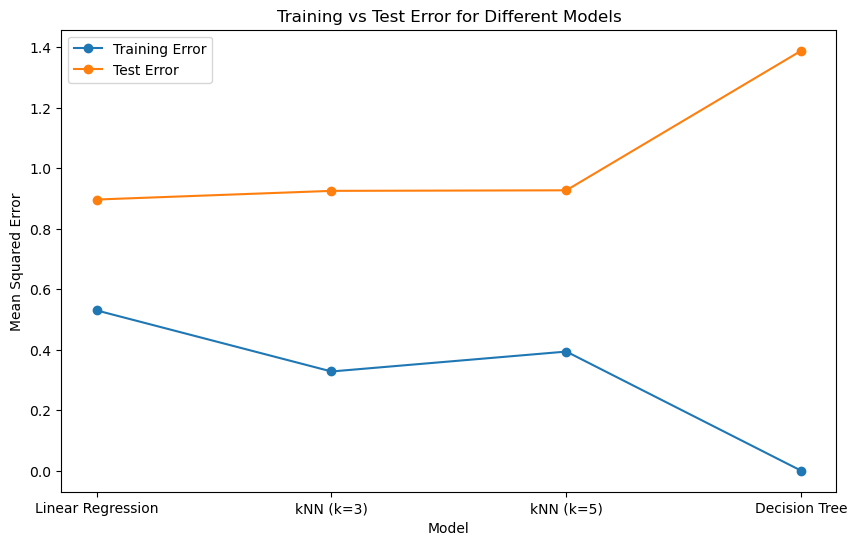

In [11]:
#plot
#aspect ratio
plt.figure(figsize=(10, 6))
model_names = list(models.keys())
train_mse = [train_errors[model] for model in model_names]
test_mse = [test_errors[model] for model in model_names]

#plots
plt.plot(model_names, train_mse, label="Training Error", marker='o')
plt.plot(model_names, test_mse, label="Test Error", marker='o')
#labs
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error for Different Models")
plt.legend()
plt.show()